# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

# Tobig's 19기 2주차 Optimization 과제

## 데이터

In [94]:
import pandas as pd
import numpy as np
import random

In [95]:
data = pd.read_csv('2wk_Optimization_assignment.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

위 코드는 train 데이터와 test 데이터를 나누는 코드이다. 하나씩 살펴보면
- data.iloc[:, 1:] : 첫 번째 열을 제외한 나머지 열 선택 //독립변수의 데이터 의미
- data.iloc[:, 0] : 첫 번째 열만 선택 // 종속변수의 모든 데이터 의미
- test_size = 0.25 : train 75% // test 25% 로 나눈 것을 의미
- random_state = 0 : 나누는 과정에서 동일한 무작위 결과 얻을 수 있도록 고정하는 것



In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

위의 결과를 확인했을 때, 75% // 25%로 train과 test가 잘 나뉜 것을 확인할 수 있다.

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [100]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


* scaling 과정에서 보통 MinmaxScaler 혹은 StandardScaler를 많이 사용한다. 그 중 위에서는 StandardScaler를 사용하여 진행하였고, 이는 평균이 0 분산을 1로 만들어주는 표준화 과정이다.
* 위에서 강조했듯이 X_train을 기준으로 표준화 fit을 진행하고, 이를 기준으로 X_test에다가도 적용해줘야 한다.
* bias는 표준화 없이 그대로 사용하였다.

In [101]:
# parameter 개수
N = len(X_train.loc[0])

In [102]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.88310631, 0.63516729, 0.22048042])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

$z = X_i \theta$ 는 로지스틱 함수의 자연상수 e의 지수에 -를 제외한 값이다.

In [103]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1-e^{-x_i \theta}}$

In [104]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [105]:
logistic(X_train.iloc[1], parameters)

0.8383263535881001

위 코드를 통해 Logistic Function을 구현했다.

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma(y_{i}log p(X_{i}) + (1 - y_{i}) log(1 - p(X_{i}))) $

In [106]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1-y) * np.log(1-p))
    return loss

In [107]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [108]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [109]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.226364931368473

In [110]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

0.8605071023014405

minus_log_cross_entropy_i와 mse_i는 각각의 데이터 셋에 대한 목적 함수로, 시그마의 안쪽 부분을 의미하고 batch_loss를 통해서 시그마를 실행함으로써 전체의 목적 함수의 평균을 구하는 것이다.

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $  -\Sigma(y_{i} - \theta^{T}X_{i})X_{ij} $
## ${\partial\over{\partial \theta_j}}l(p)=$ $  -\Sigma(y_{i} - p_{i})X_{ij} $

In [111]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return - gradient

In [112]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.06026507167861816

In [113]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.04690433211376088

In [114]:
""" from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png") """

' from IPython.display import Image\n\nImage("C:/Users/rhskr/Desktop/배치알고리즘_구현.png") '

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [115]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    return gradients

In [116]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[60.34210563679011, 4.953948092549627, 33.731021348435895]

In [117]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[90.46594619310353, 101.74369190908004, 117.84781916016405]

하나의 배치 데이터에 대한 전체 Gradient를 구하는 함수로써 나중에 이를 통해 구해진 Gradient를 바탕으로 parameter를 수정하고자 한다.

## mini-batch
인덱스로 미니 배치 나누기

In [118]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
#### data 크기 : N // batch_size : b 라고 하면 <br> 한 번의 epoch를 계산할 때, (N//b)+1의 파라미터에 대한 업데이트가 이뤄진다. <br>따라서 mini-batch는 파라미터를 한 번 업데이트 할 때 사용되는 data 양이라고 볼 수 있다. <br> idx_list는 하나의 mini-batch를 의미한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [119]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n

    parameters -= gradients
    return parameters

In [120]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.87707524, 0.62838438, 0.2126239 ])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 반복 횟수   
- num_epoch: 총 학습 횟수
<br>

BGD: 전체 학습 데이터를 한 번에 사용하여 모델의 파라미터를 업데이트하는 방법
<br>
SGD:  각 학습 데이터를 개별적으로 사용하여 모델의 파라미터를 업데이트하는 방법 (BGD 방법 개선)  
<br>
MGD: 미니 배치(mini-batch)라고 불리는 작은 데이터 묶음을 사용하여 모델의 파라미터를 업데이트하는 방법 (BGD, SGD 장점 혼합)

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  <br>
batch_size=1 -> SGD  <br>
batch_size=k -> MGD <br>
batch_size=whole -> BGD <br>

In [121]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    # 에포크 수만큼 학습 진행
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            # 한 번 학습할 때에 사용할 x와 y 데이터 
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            # gradient 구하기
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            # 위에서 구한 gradient를 이용하여 parameter 수정
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            # 수정된 parameter를 이용하여 새로운 손실함수 구함
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [122]:
#BGD
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 1.0186683697413745  params: [0.43091983 0.49554429 0.91249408]  gradients: [0.029728496006239963, 0.010564953789861385, 0.03336615263972843]


epoch: 100  loss: 0.4713687198929431  params: [-0.81401913  0.74624696 -0.64980386]  gradients: [0.003670721542351625, -0.006568810375337964, 0.007404152383448334]
epoch: 200  loss: 0.40033228132916066  params: [-1.02010588  1.31240779 -1.22964326]  gradients: [0.0012837555989009743, -0.004775812220477308, 0.004701366107822872]
epoch: 300  loss: 0.36613707442449744  params: [-1.12513798  1.72244805 -1.63044954]  gradients: [0.0008996903291317559, -0.003540584988531893, 0.0034423747929487464]
epoch: 400  loss: 0.34649053481014797  params: [-1.2062689   2.03478866 -1.93305702]  gradients: [0.0007375636432954181, -0.002769085846776855, 0.002673579470026575]
epoch: 500  loss: 0.3340409950265245  params: [-1.27404183  2.2838991  -2.17289983]  gradients: [0.0006240937534479165, -0.002249403763264273, 0.0021597262313430847]
epoch: 600  loss: 0.32561935841248124  params: [-1.33179424  2.48907768 -2.36943803]  gradients: [0.0005351995049643916, -0.0018768915397699333, 0.0017937229363102734]
epo

array([-1.49634344,  3.0512477 , -2.90328021])

In [123]:
#SGD
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.27297244495481  params: [-0.87938437  1.21745366 -1.33877609]  gradients: [0.024702386234399343, 0.01344306221580425, 0.017380370254633702]
epoch: 100  loss: 0.07736665391069168  params: [-1.93032631  4.17502134 -4.06769281]  gradients: [0.007538537650980447, 0.004102479400034251, 0.0053040452978619975]
epoch: 200  loss: 0.07736266551655074  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521331779, 0.004102273621517777, 0.005303779249341999]
epoch: 300  loss: 0.0773626651836168  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767101, 0.00410227360434025, 0.005303779227133383]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0.077

array([-1.9303681 ,  4.17514311, -4.06780375])

In [124]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 0.9923705977394728  params: [0.46074355 0.213963   0.0560158 ]  gradients: [0.052663903541010686, 0.0469343687368357, 0.06133567111135318]


array([-1.02347429,  1.2375899 , -1.21846971])

MGD loss가 제일 적은 것을 확인할 수 있다.

### Predict Label

In [125]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [126]:
from sklearn.metrics import *

In [127]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [128]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [129]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [130]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [131]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.58225479, 2.7178229 ])

In [132]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.3956780913850176  params: [0.92968789 1.38930257]  gradients: [-0.05128588625262459, -0.05104829267694299]
epoch: 100  loss: 0.12938433936786695  params: [0.55776501 2.75803927]  gradients: [-0.0019483573999728868, -0.005630539556421216]
epoch: 200  loss: 0.12927754028655367  params: [0.55646813 2.76042703]  gradients: [-0.0019370965953091326, -0.0055949961551300005]
epoch: 300  loss: 0.12927733069798356  params: [0.55646557 2.76043173]  gradients: [-0.0019370744247171334, -0.005594926176272239]
epoch: 400  loss: 0.1292773302853423  params: [0.55646557 2.76043174]  gradients: [-0.0019370743810670536, -0.005594926038495908]
epoch: 500  loss: 0.12927733028453003  params: [0.55646557 2.76043174]  gradients: [-0.001937074380981137, -0.005594926038224671]
epoch: 600  loss: 0.12927733028452795  params: [0.55646557 2.76043174]  gradients: [-0.0019370743809808725, -0.005594926038223976]
epoch: 700  loss: 0.12927733028452795  params: [0.55646557 2.76043174]  gradients: [-0.001

array([0.55646557, 2.76043174])

In [133]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

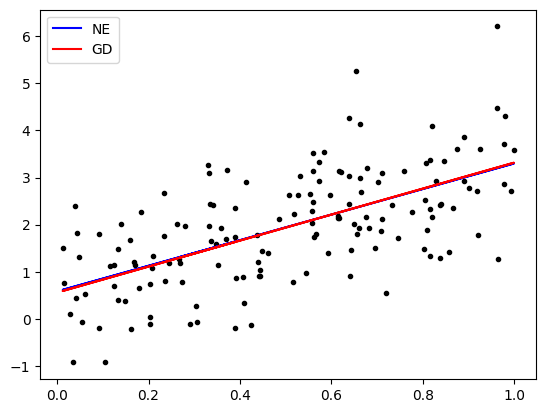

In [134]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()